<a href="https://colab.research.google.com/github/ddy623/Kaggle-Projects/blob/main/FriendsTVShowRatings1994.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)
import missingno
from sklearn.model_selection import train_test_split,GridSearchCV
# Set pandas as the default output for sklearn
from sklearn.linear_model import LinearRegression
from sklearn import set_config
from sklearn.experimental import enable_iterative_imputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [3]:
def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics
def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)

  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )

  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)

In [4]:
# Load Data
fpath = '/content/drive/MyDrive/Colab Notebooks/Data Science Project/friends_july_2024 (1).csv'
df = pd.read_csv(fpath)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   episode_title        234 non-null    object 
 1   description          234 non-null    object 
 2   season               234 non-null    int64  
 3   episode              234 non-null    int64  
 4   duration_in_minutes  234 non-null    int64  
 5   year                 234 non-null    int64  
 6   director             234 non-null    object 
 7   rating               234 non-null    float64
 8   total_votes          234 non-null    int64  
 9   special_episode      234 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 18.4+ KB


In [5]:
df.head()

,episode_title,description,season,episode,duration_in_minutes,year,director,rating,total_votes,special_episode
0,The One Where Monica Gets a Roommate,"Monica and the gang introduce Rachel to the ""r...",1,1,22,1994,James Burrows,8.1,10266,0
1,The One with the Sonogram at the End,Ross finds out his ex-wife is pregnant. Rachel...,1,2,22,1994,James Burrows,7.9,7986,0
2,The One with the Thumb,Monica becomes irritated when everyone likes h...,1,3,22,1994,James Burrows,8.0,7632,0
3,The One with George Stephanopoulos,Joey and Chandler take Ross to a hockey game t...,1,4,22,1994,James Burrows,7.9,7302,0
4,The One with the East German Laundry Detergent,"Eager to spend time with Rachel, Ross pretends...",1,5,22,1994,Pamela Fryman,8.3,7341,0


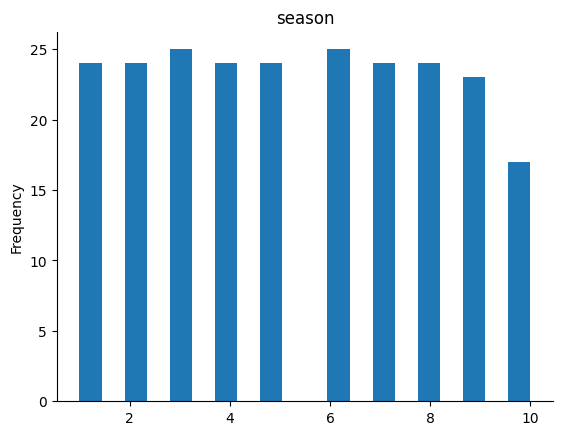

In [6]:
# @title season

from matplotlib import pyplot as plt
df['season'].plot(kind='hist', bins=20, title='season')
plt.gca().spines[['top', 'right',]].set_visible(False)

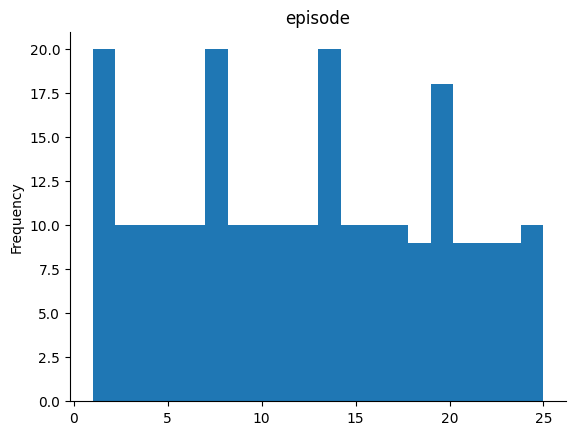

In [7]:
# @title episode

from matplotlib import pyplot as plt
df['episode'].plot(kind='hist', bins=20, title='episode')
plt.gca().spines[['top', 'right',]].set_visible(False)

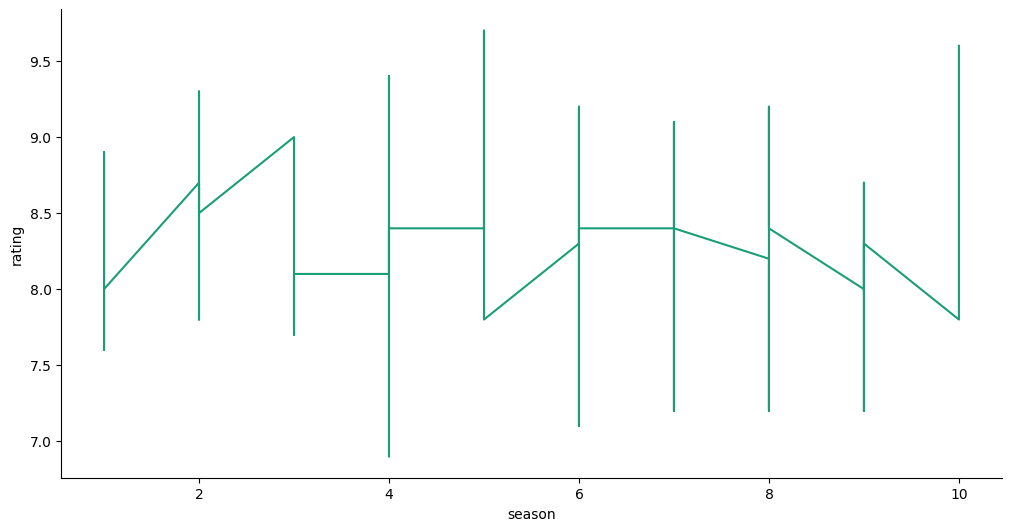

In [8]:
# @title season vs rating

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['season']
  ys = series['rating']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('season', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('season')
_ = plt.ylabel('rating')

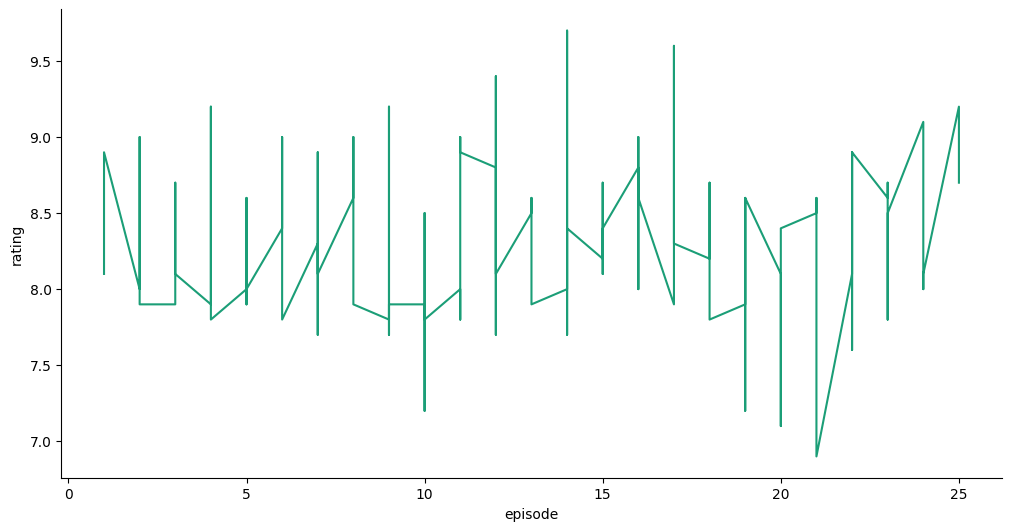

In [9]:
# @title episode vs rating

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['episode']
  ys = series['rating']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('episode', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('episode')
_ = plt.ylabel('rating')

In [10]:
# Define features (X) and target (y).
X = df[['episode', 'season']]
y = df['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:

pipe = make_pipeline(LinearRegression())

In [12]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('linearregression', LinearRegression())])

In [13]:
pipe.score(X_train, y_train)

0.002941833618404166

In [14]:
pipe.score(X_test, y_test)

-0.004776143367593688

In [15]:
pipe.predict(X_test)

array([8.29622375, 8.30843992, 8.29765323, 8.25464887, 8.27607986,
       8.28529468, 8.28343803, 8.29950987, 8.32594123, 8.26965   ,
       8.30172528, 8.26122111, 8.30922585, 8.25293461, 8.29593897,
       8.26936522, 8.27965075, 8.29279524, 8.30422547, 8.23793348,
       8.31344029, 8.25714906, 8.30451025, 8.31858306, 8.29172453,
       8.24043367, 8.28200855, 8.30515379, 8.27700818, 8.27715056,
       8.26686504, 8.28872318, 8.29043744, 8.30608212, 8.27107948,
       8.27265135, 8.31186843, 8.27215019, 8.29186692, 8.29015266,
       8.30436786, 8.30093935, 8.26857929, 8.27372205, 8.2909386 ,
       8.31422623, 8.2720078 , 8.30529618, 8.28936673, 8.27186541,
       8.2968673 , 8.3192266 , 8.30686805, 8.28672415, 8.28279449,
       8.25529241, 8.32186918, 8.2495061 , 8.27293612])

In [16]:
evaluate_regression(pipe, X_train, y_train,
                    X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 0.340
- MSE = 0.185
- RMSE = 0.430
- R^2 = 0.003

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 0.314
- MSE = 0.170
- RMSE = 0.412
- R^2 = -0.005


In [17]:
#Let's look at the variables episode vs season and total votes
# Define features (X) and target (y).
X1 = df[['episode', 'season']]
y1 = df['total_votes']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=42)


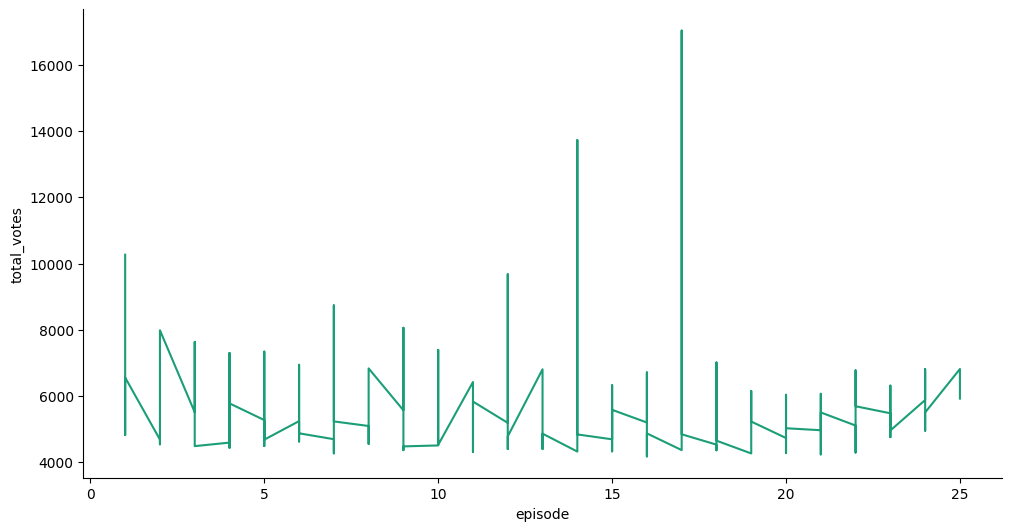

In [18]:
# @title episode vs total votes

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['episode']
  ys = series['total_votes']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('episode', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('episode')
_ = plt.ylabel('total_votes')

Season vs Total Votes

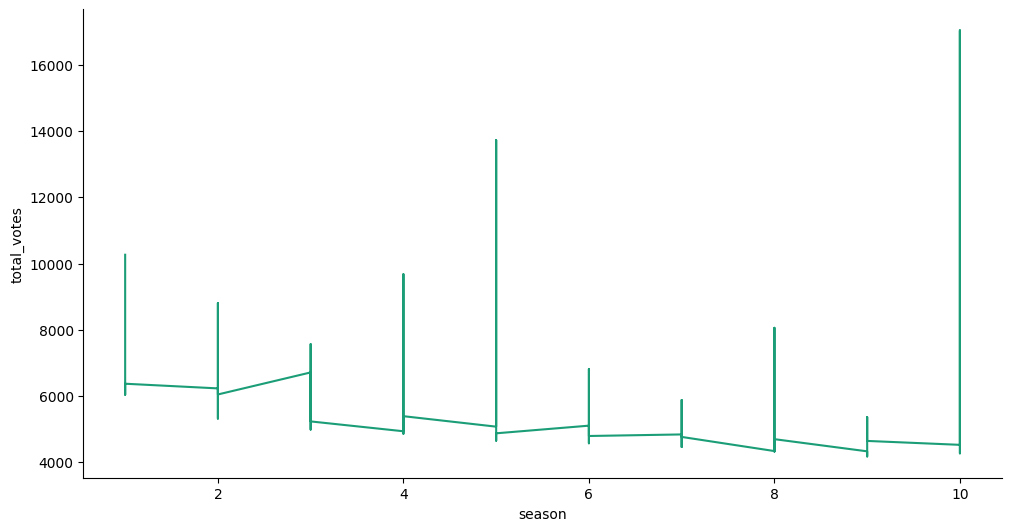

In [19]:
# season vs total votes

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['season']
  ys = series['total_votes']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('season', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('season')
_ = plt.ylabel('total_votes')

In [20]:
pipe1 = make_pipeline(LinearRegression()
)

In [21]:
pipe1.fit(X1_train, y1_train)

Pipeline(steps=[('linearregression', LinearRegression())])

In [22]:
pipe1.score(X1_train, y1_train)

0.1290419694270457

In [23]:
pipe1.score(X1_test, y1_test)

0.35724324780860117

In [24]:
pipe1.predict(X1_test)

array([5762.15952124, 4794.59247786, 5015.4167753 , 6339.95239849,
       5457.06537017, 5541.74538523, 4964.77283083, 5592.38932969,
       4675.46623078, 6237.84418671, 4692.8944275 , 6000.4120154 ,
       4641.84032161, 6204.21827754, 4879.68265434, 5355.36731981,
       6169.77204552, 5490.69127934, 4675.8763922 , 6306.32648932,
       4760.55640726, 6322.93436319, 5558.3532591 , 5167.75877011,
       4760.96656869, 6289.30845403, 5711.51557677, 4964.3626694 ,
       5745.55164737, 6186.79008081, 5372.38535511, 5813.21362713,
       5948.94774808, 5252.8489466 , 5491.10144076, 5185.59712827,
       5066.06071976, 6220.82615141, 5202.20500214, 5066.47088119,
       5117.11482565, 4845.64658375, 5508.11947606, 5915.32183891,
       4913.71872494, 4607.80425102, 5779.58771796, 5405.60110285,
       5219.22303744, 5338.34928452, 5168.16893154, 4573.76818042,
       5100.09679035, 4795.00263929, 5558.76342053, 5745.9618088 ,
       4997.98857857, 5932.75003564, 6068.07399516])

In [25]:
evaluate_regression(pipe1, X1_train, y1_train,
                    X1_test, y1_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 705.469
- MSE = 1,853,990.059
- RMSE = 1,361.613
- R^2 = 0.129

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 483.926
- MSE = 524,399.835
- RMSE = 724.155
- R^2 = 0.357
